# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = '/Users/davide/Desktop/Università/Magistrale - PoliMi/Anno 1 - 2023:2024/Semestre 1/Numerical Analysis/Laboratory/Lab 2/ovariancancer_obs.csv'
ovariancancer_grp_path = '/Users/davide/Desktop/Università/Magistrale - PoliMi/Anno 1 - 2023:2024/Semestre 1/Numerical Analysis/Laboratory/Lab 2/ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',')
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

print(grp.shape, A.shape)
grp, A
# sample sulle colonne e feature sulle righe --> al contrario del solito

(216,) (216, 4000)


(array(['Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 

How many patients? How many features?

In [3]:
print(f"Number of patients: {A.shape[0]}, number of features: {A.shape[1]}")

Number of patients: 216, number of features: 4000


How many patiens with and without cancer are there in the dataset?

In [4]:
count_c = 0
for x in grp:
    if x == "Cancer":
        count_c += 1
print(f"There are {count_c} patients with cancer and {len(grp) - count_c} patients without")

There are 121 patients with cancer and 95 patients without


Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

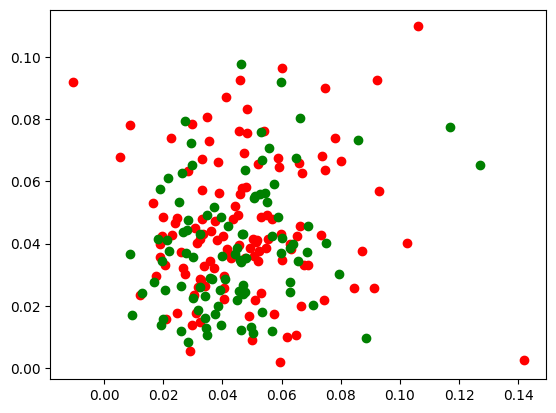

In [5]:
prot_1 = 50
prot_2 = 3500

with_c, no_c = list(), list()

for i, data in enumerate(A):
    if grp[i] == "Cancer":
        with_c.append([data[prot_1], data[prot_2]])
    else:
        no_c.append([data[prot_1], data[prot_2]])

plt.scatter([x[0] for x in with_c], [x[1] for x in with_c], color="r")
plt.scatter([x[0] for x in no_c], [x[1] for x in no_c], color="g")

Repeat the previous point, this time by considering three proteins.

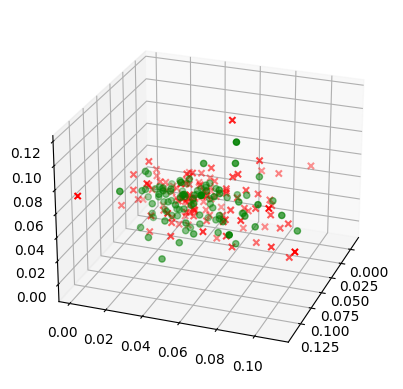

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

prot_1 = 50
prot_2 = 3500
prot_3 = 1500

with_c, no_c = list(), list()

for i, data in enumerate(A):
    if grp[i] == "Cancer":
        with_c.append([data[prot_1], data[prot_2], data[prot_3]])
    else:
        no_c.append([data[prot_1], data[prot_2], data[prot_3]])

ax.scatter([x[0] for x in with_c], [x[1] for x in with_c], [x[2] for x in with_c], marker="x" ,color="r")
ax.scatter([x[0] for x in no_c], [x[1] for x in no_c], [x[2] for x in no_c], marker="o" ,color="g")

ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [7]:
# preferisco questa rappresentazione di A --> occhio che la prof usa la matrice A trasposta
h = np.identity(A.shape[0]) - (1/A.shape[0]) * np.ones((A.shape[0], A.shape[0])) # matrice centrale
A_center = h @ A

A_cov = (A_center.T @ A_center) / (A.shape[1] - 1) # calcolo la matrice di covarianza

u, s, vt = np.linalg.svd(A_cov) # computazione molto lenta --> molte colonne

PCA_A = A @ vt.T
print(PCA_A.shape)

(216, 4000)
(216, 4000)


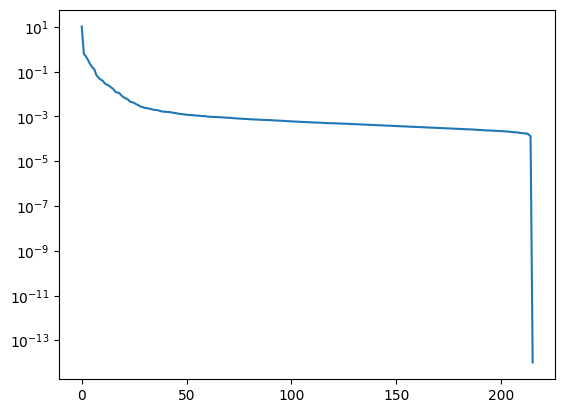

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
axes[0][0].set_yscale("log")
axes[0][0].plot([x for x in range(A.shape[0])], [s[i] for i in range(A.shape[0])])

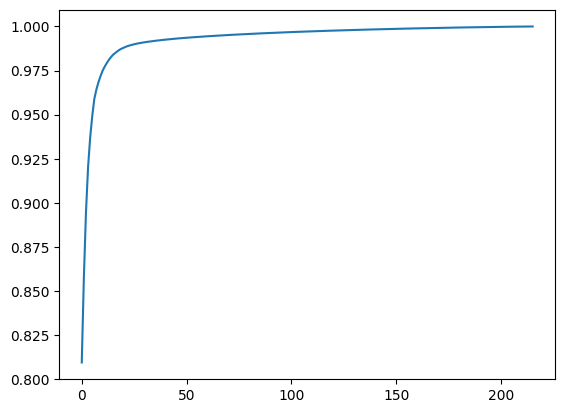

In [9]:
plt.plot([x for x in range(A.shape[0])], [sum(s[0:i + 1]) / sum(s) for i in range(A.shape[0])])

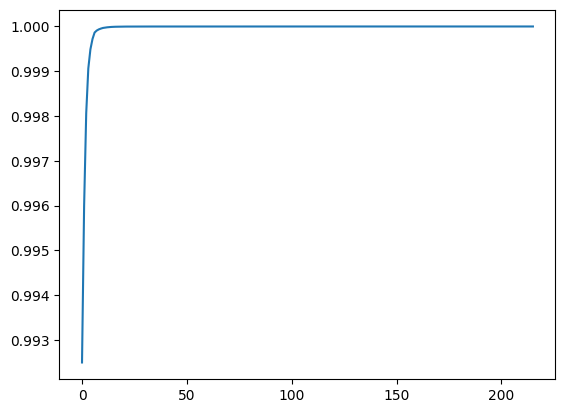

In [10]:
import math

def sum_squared(arr):
  tot = 0
  for num in arr:
    tot += math.pow(num, 2)
  return tot

plt.plot([x for x in range(A.shape[0])], [sum_squared(s[0:i + 1]) / sum_squared(s) for i in range(A.shape[0])])

Make a scatterplot of the first two principal components of the patients.

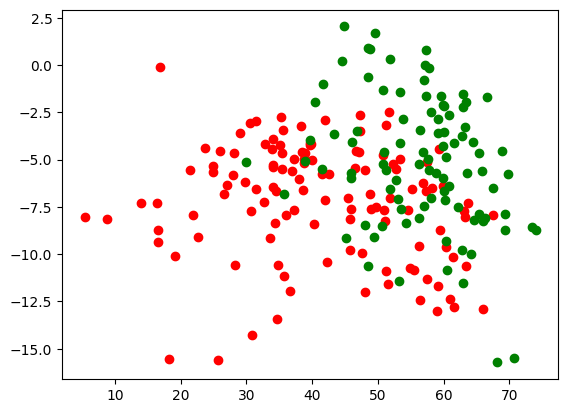

In [11]:
with_c, no_c = list(), list()

prot_1 = 0
prot_2 = 1

for i, data in enumerate(PCA_A):
    if grp[i] == "Cancer":
        with_c.append([data[prot_1], data[prot_2]])
    else:
        no_c.append([data[prot_1], data[prot_2]])

plt.scatter([x[0] for x in with_c], [x[1] for x in with_c], color="r")
plt.scatter([x[0] for x in no_c], [x[1] for x in no_c], color="g")

Make a scatterplot of the first three principal components of the patients.

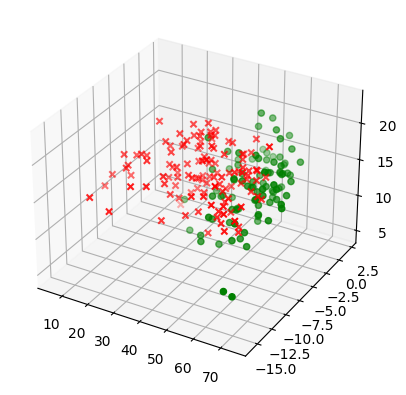

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

prot_1 = 0
prot_2 = 1
prot_3 = 2

with_c, no_c = list(), list()

for i, data in enumerate(PCA_A):
    if grp[i] == "Cancer":
        with_c.append([data[prot_1], data[prot_2], data[prot_3]])
    else:
        no_c.append([data[prot_1], data[prot_2], data[prot_3]])

ax.scatter([x[0] for x in with_c], [x[1] for x in with_c], [x[2] for x in with_c], marker="x" ,color="r")
ax.scatter([x[0] for x in no_c], [x[1] for x in no_c], [x[2] for x in no_c], marker="o" ,color="g")